### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = pd.read_csv("../data/raw/ai_productivity_features.csv")
targets = pd.read_csv("../data/raw/ai_productivity_targets.csv")

df = features.merge(targets, on="Employee_ID")
df.head()

,Employee_ID,job_role,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score,productivity_score,burnout_risk_level
0,3c6ca882-3fa3-446b-8208-c92f3f306f06,Writer,19,11.8,28.5,19.2,1.4,High,1.9,2.3,0.20,2,7.1,4.8,10.00,81.0,High
1,02f168cc-7747-4dbd-a868-ea2cfb41e22a,Designer,4,10.8,24.1,23.3,2.6,Low,8.0,9.8,1.82,3,3.4,5.5,6.78,59.2,Medium
2,d39ce8c9-6e2a-4f86-b888-e2b5f4a18cf7,Developer,6,25.9,69.4,10.0,1.4,Medium,6.8,8.9,5.52,5,4.6,3.8,9.66,62.4,High
3,14511660-d78a-453f-9449-f17cd239ec27,Manager,20,7.9,17.2,25.1,0.2,High,3.5,8.6,1.14,5,5.6,3.9,10.00,76.8,High
4,0597f0bb-ed5a-4e35-94ac-3f0f6a5c2bc2,Developer,15,8.6,20.6,20.1,1.4,Low,5.9,5.3,2.75,10,1.0,7.4,5.38,53.7,Medium


In [3]:
# preprocessing
df["workload_score"] = (
    df["manual_work_hours_per_week"] +
    df["meeting_hours_per_week"] +
    df["deadline_pressure_level"].map({"Low":1, "Medium":2, "High":3})
)

df["workload_band"] = pd.qcut(df["workload_score"], q=3, labels=["Low", "Medium", "High"])
df["ai_band"] = pd.qcut(df["ai_tool_usage_hours_per_week"], q=3, labels=["Low", "Medium", "High"])

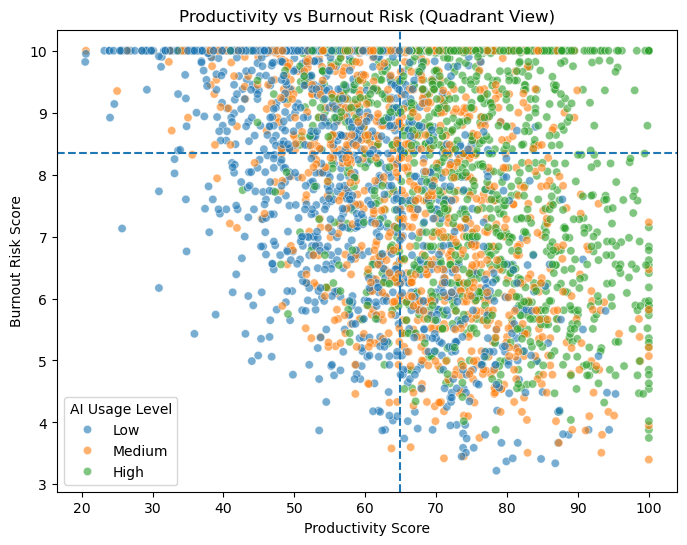

In [4]:
# JTBD 3: Productivity vs Burnout Trade-off

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df,
    x="productivity_score",
    y="burnout_risk_score",
    hue="ai_band",
    alpha=0.6
)

# adding quadrant lines at mean values
plt.axvline(df["productivity_score"].mean(), linestyle="--")
plt.axhline(df["burnout_risk_score"].mean(), linestyle="--")

plt.title("Productivity vs Burnout Risk (Quadrant View)")
plt.xlabel("Productivity Score")
plt.ylabel("Burnout Risk Score")
plt.legend(title="AI Usage Level")
plt.show()


